In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

from bert_score import plot_example, score


logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)

In [5]:
with open(f"./evaluation_set_responses.pickle", "rb") as handle:
    rag_responses = pickle.load(handle)

rag_responses["question"]

['Which class involves time series analysis?',
 'Who teaches the SQL and Databases class?',
 'What are the prerequisites for Data Science for Social Good?',
 'When are the office hours for the Math Methods course?',
 'Are there any weekly readings for Milestone II?',
 'What are the outcomes of Qualitative Inquiry?',
 'What textbook is required for SIADS 505?',
 'What textbook is required for Data Manipulation?',
 'Which week of unsupervised learning covers DBSCAN?',
 'How many credits are required to complete the MADS program?',
 'How long do students have to complete the MADS program start to finish?']

In [12]:
scores = [
    [
        t.item()
        for t in score(
            [rag_responses["answer"][i]], [rag_responses["ground_truth"][i]], lang="en"
        )
    ]
    for i in range(len(rag_responses["question"]))
]

In [15]:
pd.DataFrame(scores, columns=["precision", "recall", "f1"])

,precision,recall,f1
0,0.723260,0.863545,0.787201
1,0.837477,0.910539,0.872481
2,0.834055,0.912783,0.871645
3,0.848375,0.824902,0.836474
4,0.909674,0.884154,0.896732
5,0.729995,0.797195,0.762116
6,0.844774,0.755099,0.797424
7,0.920386,0.745865,0.823986
8,0.817514,0.867913,0.841960
9,0.807945,0.829957,0.818803


In [17]:
df = pd.concat(
    [
        pd.DataFrame(rag_responses),
        pd.DataFrame(scores, columns=["precision", "recall", "f1"]),
    ], axis="columns"
)

# df[["precision", "recall", "f1"]] = df.apply(
#     lambda row: [t.item() for t in score([row["answer"]], [row["ground_truth"]], lang="en")],
#     axis=1,
# )

df

,question,contexts,answer,ground_truth,precision,recall,f1
0,Which class involves time series analysis?,"[Data Mining II (SIADS 632), Learning Outcomes...",Data Manipulation and Visual Exploration of D...,"Data Mining II, SIADS 632 includes a particula...",0.723260,0.863545,0.787201
1,Who teaches the SQL and Databases class?,"[SQL and Databases (SIADS 511), Instructor And...",The instructor is Graham Hukill (gshukill@umi...,The primary instructor for SQL and Databases i...,0.837477,0.910539,0.872481
2,What are the prerequisites for Data Science fo...,"[Data Science for Social Good (SIADS 688), Cou...",The prerequisites for SIADS 688 include: Prec...,"SIADS 630, 631, and 694",0.834055,0.912783,0.871645
3,When are the office hours for the Math Methods...,"[Math Methods II (SIADS 602), Course Schedule:...",The office hours for Math Methods are on Wedn...,Office hours for Math Methods are held at the ...,0.848375,0.824902,0.836474
4,Are there any weekly readings for Milestone II?,"[Milestone II (SIADS 696), Weekly Readings: Th...","No, there are no weekly readings for Mileston...",There is introductory material during the firs...,0.909674,0.884154,0.896732
5,What are the outcomes of Qualitative Inquiry?,[Qualitative Inquiry for Data Scientists (SIAD...,Qualitative data analysis is a process of mak...,"Upon successful completion of this course, stu...",0.729995,0.797195,0.762116
6,What textbook is required for SIADS 505?,"[Health Analytics (SIADS 681), Weekly Readings...",SIADS 505 does not require a textbook.\n,Python for Data Analysis: Data Wrangling with ...,0.844774,0.755099,0.797424
7,What textbook is required for Data Manipulation?,"[Data Manipulation (SIADS 505), Course Syllabu...",None.\n,Python for Data Analysis: Data Wrangling with ...,0.920386,0.745865,0.823986
8,Which week of unsupervised learning covers DBS...,"[Unsupervised Learning (SIADS 543), Learning O...",The DBSCAN algorithm is covered in week 2 of ...,Week 2,0.817514,0.867913,0.841960
9,How many credits are required to complete the ...,[Grades/Transcripts > Q: What is the minimum G...,34 credits are required to complete the progr...,34,0.807945,0.829957,0.818803


In [18]:
df[["question", "answer", "ground_truth", "precision", "recall", "f1"]]

,question,answer,ground_truth,precision,recall,f1
0,Which class involves time series analysis?,Data Manipulation and Visual Exploration of D...,"Data Mining II, SIADS 632 includes a particula...",0.723260,0.863545,0.787201
1,Who teaches the SQL and Databases class?,The instructor is Graham Hukill (gshukill@umi...,The primary instructor for SQL and Databases i...,0.837477,0.910539,0.872481
2,What are the prerequisites for Data Science fo...,The prerequisites for SIADS 688 include: Prec...,"SIADS 630, 631, and 694",0.834055,0.912783,0.871645
3,When are the office hours for the Math Methods...,The office hours for Math Methods are on Wedn...,Office hours for Math Methods are held at the ...,0.848375,0.824902,0.836474
4,Are there any weekly readings for Milestone II?,"No, there are no weekly readings for Mileston...",There is introductory material during the firs...,0.909674,0.884154,0.896732
5,What are the outcomes of Qualitative Inquiry?,Qualitative data analysis is a process of mak...,"Upon successful completion of this course, stu...",0.729995,0.797195,0.762116
6,What textbook is required for SIADS 505?,SIADS 505 does not require a textbook.\n,Python for Data Analysis: Data Wrangling with ...,0.844774,0.755099,0.797424
7,What textbook is required for Data Manipulation?,None.\n,Python for Data Analysis: Data Wrangling with ...,0.920386,0.745865,0.823986
8,Which week of unsupervised learning covers DBS...,The DBSCAN algorithm is covered in week 2 of ...,Week 2,0.817514,0.867913,0.841960
9,How many credits are required to complete the ...,34 credits are required to complete the progr...,34,0.807945,0.829957,0.818803


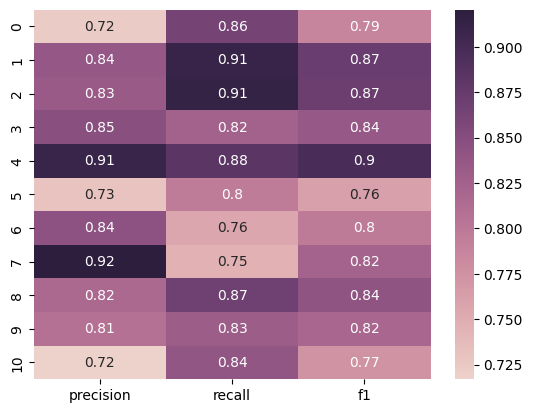

In [19]:
sns.heatmap(
    df[["precision", "recall", "f1"]],
    annot=True,
    cmap=sns.cubehelix_palette(as_cmap=True),
)

plt.show()

In [ ]:
df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]].plot(kind='box')
plt.show()

In [ ]:
from bert_score import score

df = pd.DataFrame(rag_responses)

# Calculate BERTScore for each response
df["bertscore"] = df.apply(
    lambda row: score([row["answer"]], [row["ground_truth"]], lang="en", verbose=True)[
        2
    ][0].item(),
    axis=1,
)

df[["question", "ground_truth", "bertscore"]]

In [ ]:
score([rag_responses["answer"][0]], [rag_responses["ground_truth"][0]], lang="en", verbose=True)

In [ ]:
# P, R, F1 
t = score(
    [rag_responses["answer"][0]],
    [rag_responses["ground_truth"][0]],
    lang="en",
    verbose=True,
)

t[0]

In [ ]:
type(t[0].item()), t[0].item()

In [ ]:
from bert_score import plot_example

plot_example(
    rag_responses["answer"][0],
    rag_responses["ground_truth"][0],
    lang="en",
)

# Metrics Viz from Milestone 2

In [ ]:
import altair as alt


metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc,
}

df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

base = alt.Chart(df_metrics).encode(
    y=alt.Y("Metric:N", axis=alt.Axis(title="Metric"), sort=df_metrics["Metric"].values),
    x=alt.X("Score:Q", axis=alt.Axis(title="Score"), scale=alt.Scale(domain=[0, 1])),
)

bar = base.mark_bar().encode(
    color=alt.Color("Metric:N", legend=None), text=alt.Text("Score:Q", format=".2f")
)

text = base.mark_text(
    align="right",
    baseline="middle",
    color="white",
    dx=-10,
).encode(text=alt.Text("Score:Q", format=".2f"))

chart = (
    (bar + text)
    .properties(title=f"{MODEL_NAME} Evaluation Metrics", width=600, height=300)
    .configure_axis(labelFontSize=12, titleFontSize=14)
)

# Can't get this one to save programmatically :(
# from altair_saver import save
# chart.save(f"./visualizations/{MODEL}_metrics.png")
# save(chart, f"./visualizations/{MODEL}_metrics.png")

chart